## Regression

In [1]:
import graphlab as gl
import pandas as pd

[WARNING] graphlab.product_key: Unable to write current GraphLab Create license to /home/mayank/.graphlab/config. Ensure that this user account                         has write permission to /home/mayank/.graphlab/config to save the license for offline use.


This non-commercial license of GraphLab Create for academic use is assigned to h20160014@goa.bits-pilani.ac.in and will expire on March 06, 2019.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1521321555.log
[WARNING] graphlab.deploy._session: Unable to create session in specified location: '/home/mayank/.graphlab/artifacts'. Using: '/var/tmp/graphlab-mayank/15232/tmp_session_e4f64996-042f-40c0-8ac1-1f3d4cfff6b3'


In [2]:
sales = gl.SFrame.read_csv('Philadelphia_Crime_Rate_noNA.csv')

Finished parsing file /home/mayank/Desktop/Work/GIT_REPO/self-mastery-zone/Machine learning specialization/Regression A machine Learning perspective/week1/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.037651 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/mayank/Desktop/Work/GIT_REPO/self-mastery-zone/Machine learning specialization/Regression A machine Learning perspective/week1/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.035871 secs.

In [3]:
sales.head()

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


In [4]:
gl.canvas.set_target('ipynb')

In [7]:
sales.show(view="Scatter Plot", x="CrimeRate",y="HousePrice")

In [16]:
crime_model = gl.linear_regression.create(sales, target='HousePrice', features=['CrimeRate'],validation_set=None, verbose=False)

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

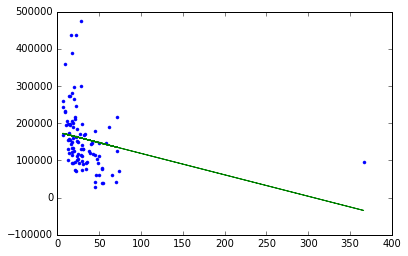

In [19]:
plt.plot(sales['CrimeRate'],sales['HousePrice'],'.',
        sales['CrimeRate'],crime_model.predict(sales),'-')

In [24]:
sales_noCC =sales[sales['MilesPhila'] !=0.0]

In [25]:
sales_noCC.show(view='Scatter Plot',x='CrimeRate', y='HousePrice')

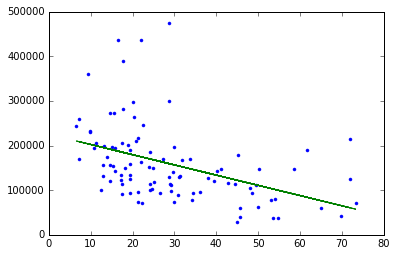

In [28]:
crime_model_noCC = gl.linear_regression.create(sales_noCC, target='HousePrice', features=['CrimeRate'],validation_set=None, verbose=False)
plt.plot(sales_noCC['CrimeRate'],sales_noCC['HousePrice'],'.',
        sales_noCC['CrimeRate'],crime_model_noCC.predict(sales_noCC),'-')

In [29]:
crime_model.get('coefficients')

name,index,value,stderr
(intercept),None,176626.046881,11245.5882194
CrimeRate,None,-576.804949058,226.90225951


In [31]:
crime_model_noCC.get('coefficients')

name,index,value,stderr
(intercept),None,225204.604303,16404.0247514
CrimeRate,None,-2287.69717443,491.537478123
